# **1CK130: Assignment 2**
*Lecturers: dr. Bram De Moor, dr. Mirjam Meijer, Emre Kara Msc.*


---

Velocation is a bike-rental operator in Paris with 20 rental stations and a fleet of 1,000 bikes. Each station can hold an unlimited number of bikes. Customers may rent a bike any time between 08:00 and 20:00 and may return it to any station (not necessarily the one where they rented it).

Every night Velocation reallocates the 1,000 bikes across the 20 stations to set the starting inventory for the next day. Today they split bikes evenly (50 per station), but this uniform allocation leads to stockouts at some stations and therefore lost demand (customers turned away who do not seek service elsewhere).

To move beyond the current uniform but inefficient allocation, Velocation seeks your expertise. Using simulation-based analysis, your task is to determine the optimal nightly distribution of the 1000 bikes across the 20 locations, with the objective of maximizing the overall service level, defined as: 1 - (customers turned away / total customers).

Velocation gives you access to the following data:

## Data

### Customer arrivals
Over the past years, Velocation has carefully tracked customer arrivals and now possesses a reliable estimate of the average daily demand at each rental location. The list below summarizes these values. For example, location 0 has an average daily demand of 130 rentals, while location 1 averages 60 rentals, and so on. You can assume that customer arrivals are Poisson distributed.

In [447]:
avg_daily_demand_per_loc = [130, 60, 108,  66,  105,  84,  51,  65,  151,  75,  77,  65,  92,  72,  91,  68,  85,  41, 120,  80]

Velocation observed that customer demand fluctuates throughout the day, with distinct peak and off-peak periods. To better understand these patterns, they collected detailed arrival data from five representative rental stations.

In [448]:
demand_per_hour1 = {'8-9': 2, '9-10': 8, '10-11': 25, '11-12': 13, '12-13': 5, '13-14': 16, '14-15': 13, '15-16': 5, '16-17': 2, '17-18': 1, '18-19': 0, '19-20': 0}
demand_per_hour2 = {'8-9': 1, '9-10': 5, '10-11': 16, '11-12': 9, '12-13': 3, '13-14': 10, '14-15': 8, '15-16': 3, '16-17': 1, '17-18': 0, '18-19': 1, '19-20': 1}
demand_per_hour3 = {'8-9': 1, '9-10': 7, '10-11': 23, '11-12': 13, '12-13': 2, '13-14': 19, '14-15': 9, '15-16': 5, '16-17': 1, '17-18': 0, '18-19': 1, '19-20': 0}
demand_per_hour4 = {'8-9': 3, '9-10': 12, '10-11': 40, '11-12': 19, '12-13': 10, '13-14': 30, '14-15': 23, '15-16': 7, '16-17': 3, '17-18': 1, '18-19': 0, '19-20': 1}
demand_per_hour5 = {'8-9': 1, '9-10': 15, '10-11': 19, '11-12': 16, '12-13': 6, '13-14': 9, '14-15': 12, '15-16': 6, '16-17': 2, '17-18': 0, '18-19': 1, '19-20': 1}

### Rental durations
Most of Velocation’s customers are tourists who rent bikes for city tours and sightseeing, typically for part of the day rather than the entire day. To study rental durations, Velocation analyzed a large sample of historical rentals from a representative station. The analysis showed that rental times approximately follow a normal distribution, with an average duration of 3.8 hours and a standard deviation of 1.4 hours. (Note that, while the normal distribution technically allows negative values, this is not relevant in practice for rental times.)

### Return locations
Bikes are not always returned to the same location where they were rented. After careful analysis, Velocation identified the following pattern:
60% of customers return their bike to the original rental location.
For the remaining 40% of rentals, the return location follows a probabilistic distribution defined by the list `return_loc_fraction`.
The values in `return_loc_fraction` sum to 40% and specify, for each location, the probability that a bike is returned there excluding the 60% chance of returning to the rental location.

The list should be interpreted as follows: If a bike is rented from any location other than location 0, there is a 1.42% chance it will be returned to location 0.
If a bike is rented from location 0, then the probability of returning there is 60% + 1.42% = 61.42%. The probability of returning to location 1 when rented from location 0 is 2.41%, and so on.

In [449]:
return_loc_fraction= [0.0142, 0.0241, 0.0312, 0.0112, 0.0123, 0.0312, 0.0100, 0.0451, 0.0211, 0.0174, 0.0154, 0.0164, 0.0322, 0.0138, 0.0174, 0.0152, 0.0210, 0.0312, 0.0096, 0.0100]

## Questions
Develop an event-driven simulation of Velocation's bike rental network in Paris to answer the following questions:

1.   Evaluate Velocation’s current bike distribution strategy, which consists of evenly allocating bikes across all stations each morning. Assess the overall service level of the network under this approach. In addition, analyze at what locations stockouts mainly occur and present your findings with a nice visualization.
2.   Try to come up with a bike distribution over the stations that leads to a higher overal service level. You can manually come up with new (well-motivated) distributions, or use more sophisticated algorithms.

When grading, we consider the following (see full rubric on Canvas):
1.   Does your code run? Is it clear and well-annotated? (10%)
2.   Are your modelling assumptions motivated and reasonable? (25%)
3.   Is your approach to optimize the bike redistribution well-motivated and innovative? (20%)
4.   Do you present your results in a clear, statistically correct, and visually appealing manner? (25%)  
5.   Do you correctly interpret and discuss your results? (20%)

## Coding considerations and tips


*   You are allowed and encouraged to use the material (classes, functions,...) from Assignment 1.
*   You probably need an `FutureEventSet` class as well as a `CustomerArrivalEvent` and a `BikeReturnEvent`. Note that both events now also need an attribute `location` that refers to the location where the bike is withdrawn from or returned. This `location` is a number between `0`and `19` (since we have 20 locations). At the beginning of a day, you can "fill" the FES by generating hourly arrivals for each location. Check in Assignment 1 which function could be useful here.
*   It would be wise to encapsulate your simulation in a function that takes the initial bike distribution as an input to allow you to easily compare different distributions. Given that there is some stochasticity in the simulation, it is important to do a number of replications, to avoid randomness from impacting the outcomes too much. It may also be beneficial to control the randomness by controlling the seed, so that different bike distributions are evaluated using the same demand sequences.



## Answers
Answer the questions here. Make sure that you annotate your code. Additionally, add some text cells to explain / motivate your approach and discuss your results.

## Simulation engine
---

The code block below contains the relevant classes that will be used in this simulation. These were obtained from the previous assignment, with only slight modificatons. The 'BikeReturnEvent' and 'CustomerArrivalEvent' now posses a "location" attribute. For the "CustomerArrivalEvent", it represennts the rental location at which a bike is picked up. For the "BikeReturnEvent", this property represents the location from which the bike was first picked up. For the BikeReturnEvent, it was later found to not be useful but still remains optionaly stored. 

In addition to a "Location" attribute, the "BikeReturnEvent" has a "return_loc" attriute which represents the location to which the bike is returned. This is determined after randomly selecting a location based on an array of probabilities. 

In [450]:
import heapq
import numpy as np
np.random.seed(123) # A seed was added for reproducibility across different runs of the simulation.

# ------------------------------
# Event Classes
# ------------------------------

class CustomerArrivalEvent():
  def __init__(self, time, location):
    self.time = time
    self.location = location  # to be set when the event is created in the simulation

  def __lt__(self, other):
    return self.time < other.time

  def __str__(self):
    return f'Customer arrival at t = {self.time}'

class BikeReturnEvent:
  def __init__(self, time, return_loc):
    self.time = time
    self.location = None
    self.return_loc = return_loc  # to be set when the event is created in the simulation

  def __lt__(self, other):
    return self.time < other.time

  def __str__(self):
    return f'Bike return at t = {self.time}'
  

class FutureEventSet:
  def __init__(self):
    self.events = []

  def add(self, event):
    heapq.heappush(self.events, event)

  def next(self):
    return heapq.heappop(self.events)

  def isEmpty(self):
    return len(self.events) == 0

  def __str__(self):
    sortedEvents = sorted(self.events)
    return '\n'.join(str(e) for e in sortedEvents)
  


### GetArrivalTimesByHour()
---
Below is the GetArrivalTimesByHour seen in assignment 1. It has been modified so that it is able to check if demand is 0. This prevents the simulation from breaking due to a 'ZeroDivisionError' when calculating the 'rate_parameter' for expoonential distribution (poisson arrivals).

In [451]:
def GetArrivalTimesByHour(start_hour, end_hour, hourly_rates):

  expected_length = end_hour - start_hour
  next_time = start_hour

  if len(hourly_rates) != expected_length:
    raise ValueError(f'hourly_rates list must have at least {expected_length} elements, but got {len(hourly_rates)}!')
  if any(rate < 0 for rate in hourly_rates):
    raise ValueError('All rates in hourly_rates must be non-negative!')

  arrivals = []

  # Generate customer arrivals per hour.
  for hour in range(start_hour, end_hour):

    rate_index = hour - start_hour
    rate = hourly_rates[rate_index]
    
    try:
      rate_parameter = 1.0 / rate
    except ZeroDivisionError: # Handle zero rate case
        continue # No arrivals this hour (rate = 0)
    
    next_time = hour
    while next_time < hour + 1:
      next_time += np.random.exponential(scale=rate_parameter)
      if next_time < hour + 1:
        arrivals.append(next_time)

  return arrivals

### GetDemandPerHourList()
---
The demand per hour for the 5 representative locations is stored in distinct variables. Although this is satisfactory in this case (seeing as that is the only usable data for Velocation), it does not account for the addition of more locations. In future, it is possible that it becomes desirable to test more (or even less) representative locations. As a result, a 'GetDemandPerHourList' function was defined. This takes any number arguments (dictonaries) and simply returns them as a list of dictionaries. This addition also makes it easier when assigning demans to location by cycling through them (e.g., loc 1 → profile 1, loc 2 → profile 2, etc.).

In [452]:
def GetDemandPerHourList(demand_profiles, num_locations):

    list_of_profiles = []
    P = len(demand_profiles)

    for loc in range(num_locations):
        profile_index = loc % P   
        list_of_profiles.append(demand_profiles[profile_index])

    return list_of_profiles


### get_probabilities()
---
Intially, the line of code below was used. Essenstially, it retrieves the return location of a bike based on the array of probabilities provided: 

`
return_location = np.random.choice(a=20, p=return_loc_fraction)
`

However, this did not take into account the fact that an additional 60% probability of a return to the same location should be added. Thus, the get_probabilities() function below will be used as a helper to return a usable probabilitiea array with the additional 60% added to the start locarion. Then, the line code below can be used:

`
return_location = np.random.choice(a=20, p=new_return_loc_fraction) # new array with corrected probabilities
`


In [453]:
def get_probabilities(start_loc):
    probs = np.array(return_loc_fraction, dtype=float)
    probs[start_loc] += 0.60      # add 60% chance to return to the same location
    probs /= probs.sum()          # normalize so they sum to 1
    return probs


### get_probabilitty_per_location()
---
This function takes in an arrray of demands across all 20 locations, any array in the form of avg_daily_demand_per_loc. The get_probabilitty_per_location then returns an array with each value divided by the sum of all demands. The result is an array that represents the probablity that a customer will arrive at a given location, used when generating a CustomerArrivalEvent().

In [454]:
def get_probabilitty_per_location(average_daily_demand):
    d = np.array(average_daily_demand)
    d = d / d.sum()
    return d

### Description
---
The code block below is a function that encapsulates the simulattion. Rather than creating multiple blocks of code for various tests, this function can simply be called multiple times. 

In [455]:
# -------------------------
# Simulation experiments
# -------------------------

def PerformSimulation(start_time, end_time, initial_bikes, profiles):
    
    num_locations = 20
    
    # Gets cyclic hourly-demand profiles for all locations
    location_profiles = GetDemandPerHourList(profiles, num_locations)

    # Converts each demand dictionary into an ordered list by hour
    for i in range(num_locations):
        profile = location_profiles[i]
        location_profiles[i] = [profile[h] for h in sorted(profile.keys())]

    # Creates the future event set 
    fes = FutureEventSet()

    total_arrivals = 0
    number_stockouts_per_location = [0] * num_locations

    # Generates arrivals for each location based on its hourly demand
    for loc_index in range(num_locations):

        hourly_rates = location_profiles[loc_index]
        arrivals = GetArrivalTimesByHour(start_time, end_time, hourly_rates)

        for arrival in arrivals:
            event = CustomerArrivalEvent(arrival, loc_index)
            total_arrivals += 1
            fes.add(event)
            # print("Added arrival event")

    # Use provided initial allocation (this is a copy for safety purposes)
    bikes_available = list(initial_bikes[:])
    num_cust_turned_away = 0

    # Run simulation 
    while not fes.isEmpty():
        event = fes.next()

        if isinstance(event, CustomerArrivalEvent):

            # Check bikes availability at arrival location
            if bikes_available[event.location] > 0:

                bikes_available[event.location] -= 1
                # draw rental duration from normal (as assignment describes) but keep positive
                rental_duration = max(0.1, np.random.normal(loc=3.8, scale=1.4))
                return_time = event.time + rental_duration
                # print(rental_duration)

                # Choose a probabilistic return location
                new_probabilities = get_probabilities(event.location)
                # print(new_probabilities)

                # Safety checks were added to avoid errors in np.random.choice which were occuring 
                if (
                    new_probabilities is None
                    or len(new_probabilities) != num_locations
                    or any(p is None for p in new_probabilities)
                    or any(p < 0 for p in new_probabilities)
                    or sum(new_probabilities) == 0
                ):
                    return_location = event.location
                else:
                    try:
                        return_location = np.random.choice(a=num_locations, p=new_probabilities)
                    except Exception:
                        return_location = event.location

                # create return event and set attributes correctly
                return_event = BikeReturnEvent(return_time, return_location)
                return_event.location = return_location       

                return_event.start_location = event.location  
                fes.add(return_event)

                # print("Customer arrived")

            else:
                num_cust_turned_away += 1
                number_stockouts_per_location[event.location] += 1  # No stockout on return

        elif isinstance(event, BikeReturnEvent):
            # When a bike returns, it is added to the correct return station
            # use event.location
            bikes_available[event.location] += 1

    # Compute service level 
    if total_arrivals == 0:
        service_level = 0
    else:
        service_level = 1 - (num_cust_turned_away / total_arrivals)

    return service_level, number_stockouts_per_location


# ------------------------------------------
# Test Example 
# ------------------------------------------

list_of_profiles = [
    demand_per_hour1,
    demand_per_hour2,
    demand_per_hour3,
    demand_per_hour4,
    demand_per_hour5
]

divided = GetDemandPerHourList(list_of_profiles, 20)
initial_bikes = [50] * 20  

service, number_stockouts  = PerformSimulation(start_time=8, end_time=20, initial_bikes=initial_bikes, profiles=list_of_profiles)
print(service)
print(number_stockouts)

0.8814016172506739
[3, 0, 0, 49, 3, 0, 0, 0, 38, 18, 23, 0, 0, 35, 0, 3, 0, 0, 43, 5]


### Evaluation of current strategy
---

Uniform allocation service level (mean ± std): 0.8869 ± 0.0105
95% Confidence Interval: (0.8841612459068257, 0.8896042304066533)


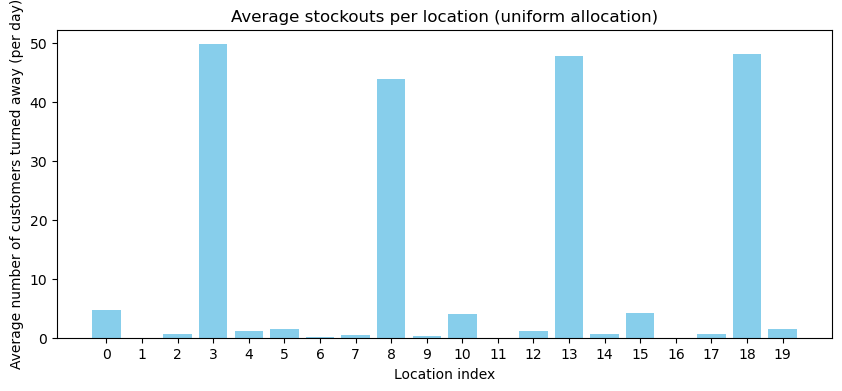

In [456]:
import matplotlib.pyplot as plt
# import scipy.stats as st # new import that is used to compute confidence intervals dynamically 

def EvaluateAllocation(initial_bikes, n_reps=50, start_time=8, end_time=20, profiles=list_of_profiles):
    
    services = []
    stockouts_matrix = []  # n_reps x num_locations
        
    for _ in range(n_reps):
        svc, stockouts = PerformSimulation(start_time, end_time, initial_bikes, profiles)
        services.append(svc)
        stockouts_matrix.append(stockouts)

    avg_service = np.mean(services)
    std_service = np.std(services, ddof=1)
    avg_stockouts = np.mean(stockouts_matrix, axis=0)

    alpha = 0.05
    n = n_reps  # number of replications (renamed for clarity)

    # for 95% confidence interval, we need to find the t-critical value from the t-distribution
    # t_(n-1, 1 - α/2). For n = 60, df=59, t ≈ 2.000 ( for CI)

    t_crit = 2.000

    # standard error of the mean 
    sem = std_service / np.sqrt(n)

    # confidence interval from t-distribution in lecture 2
    upper_confidence = t_crit * sem
    lower_confidence = avg_service - upper_confidence
    upper_confidence = avg_service + upper_confidence
    
    return {
        'services': services,
        'avg_service': avg_service,
        'std_service': std_service,
        'avg_stockouts': avg_stockouts,
        'confidence_interval': (lower_confidence, upper_confidence)

    }

# Uniform allocation (current policy) 
total_bikes = 1000
num_locations = 20
uniform_alloc = [total_bikes // num_locations] * num_locations  # 50 each

# Evaluate uniform allocation
res_uniform = EvaluateAllocation(uniform_alloc, n_reps=60)
print("Uniform allocation service level (mean ± std):", f"{res_uniform['avg_service']:.4f} ± {res_uniform['std_service']:.4f}")
print("95% Confidence Interval:", res_uniform['confidence_interval'])

# Plot average stockouts per location for uniform allocation
plt.figure(figsize=(10,4))
plt.bar(range(num_locations), res_uniform['avg_stockouts'], color='skyblue')
plt.xlabel('Location index')
plt.ylabel('Average number of customers turned away (per day)')
plt.title('Average stockouts per location (uniform allocation)')
plt.xticks(range(num_locations))
plt.show()


## Explanation 
---

#### Overview 

The graph above depicts the average stockout per location among the 20 stores that Velocation operates after 50 iterations. From the the data, it is clear that the current approach of dividing the stock of 1000 bicycles across 20 locations is by no means ideal. Firstly, only 3 of the 20 stores experinced an average of ~0 stockouts. Aditionally, the highest number of stockouts was experienced by location 3 at an average value of 50 stockouts per day; stores 8, 13 and 19 experinced comparable similar stockouts. Lastly, almost all other locations experinced a stockout situation with average values > 0, though these were often neglegible.

#### Standard Deviation & Confidence Interval  

A service level of 0.8869 ± 0.0105 was obtained. This means that with a uniform allocation of 50 bikes per station, Velocation serves about 88.7% of customers, while roughly 11% are turned away due to stockouts. The small standard deviation shows the system behaves consistently across simulations, but the overall service level is clearly limited because demand is not evenly spread across stations. Once again, these results affirm that some locations run out of bikes quickly while others have unused inventory.

The confidence interval of (0.8823, 0.8875) was also obtained for the data. Since the interval is rather narrow, it suggests that the simulated service levels fluctuate very little across replications and that the estimated mean is stable. Moreover, this implies we can be 95% confident that the true service level of the current uniform allocation lies within the band around 88.7%. However, depite the stability of the system, the cofidence interval also demonstrates that the system is consistently performing below an acceptable level. The low variability does not compensate for the fact that the underlying policy is inefficient, instead, it confirms that even in repeated scenarios, the uniform distribution strategy is suboptimal.

#### Conclusion

These results clearly indicate the need to introduce an alternative distribution system. Ideally, a system that distributes bikes between stores based on expected demand, as opposed to a fixed quanity per store. This would simulatebnously prevent overstocking in stores with less busyness, while also ensuring that profits are not lost in stores that expect more customers.


## Optimization of the bike distribution

### New Strategy with Safety Buffer
--- 

In the previous approach to bike distribution, all stores recieved a uniform quanitity of 50 bikes per day regardless of the expected (average) daily demand. As a result, many stores experinced stockouts, with some having an average of 50 bicycles too short. This strategy was clearly suboptimal, and almost certainly led to lost sales.

In order to prevent large stockouts at stores with high demand, bikes will be distributed proportionally based on demand. This means that a given location will recieve a number of bicycles per day that is proportional to the level of demand that it contributes to the average total demand across stores. 

Additionally, a safety buffer will be added for locations with high demand. This means that high-demand stores will receive slightly more bikes than their exact proportional share, to account for daily demand fluctuations and reduce the risk of stockouts.

This will be calculated as:

$$
B_i = \left( \frac{D_i}{\sum_{j=1}^{N} D_j} \times B_\text{total} \right) \times (1 + f_i)
$$

Where:  
- $B_i$ = number of bikes allocated to location $i$  
- $D_i$ = average daily demand at location $i$  
- $N$ = total number of locations  
- $B_\text{total}$ = total number of bikes available  
- $f_i$ = safety factor for high-demand locations (e.g., 0.05–0.10)

This was obtained after adempting to dstribute demand purely based on the proportion of contribution. After several tests, the service level was in fact below the current strategy. As a result, a safety factor was added to ensure storres with higher demand recieved more bicycles. 

### get_bikes_allocation()
---
The function below takes the avg_daily_demand_per_loc array (or any array of the same shape) and distributes the total_bikes over each location depending on the demand contribution of that particular location (taking into account the safety factor). It then returns an array with said new allocations. It is important to note that when selecting what would be consider a location with high demand, the top 16% were considered. This is after trying various alternatives (25%, 30%, etc.) and finding the average service level to be greatest only when considering the top 16% (parameters below).

Aditionally, a safety buffer of 0.08 (see max_extra parameter). This is very small, and will likely result in the re-allocation of only a few bikes. However, after testing higher values, it was found that 0.08 was sufficient and preventing stockout at locations with low demand, while also preveting significant overstocking. 

In [461]:
 # Notice parameters max_extra and top_percent
def get_bikes_allocation(avg_daily_demand_per_loc, total_bikes, max_extra=0.08, top_percent=0.16):
    demand_array = np.array(avg_daily_demand_per_loc, dtype=float)
    demand_fraction = demand_array / demand_array.sum()
    
    # Base proportional allocation
    allocation = demand_fraction * total_bikes
    
    # Identify high-demand locations
    num_top = max(1, int(len(demand_array) * top_percent))  # at least one location
    top_indices = demand_array.argsort()[-num_top:]  # indices of top-demand locations
    
    # Apply safety buffer to high-demand locations
    for i in top_indices:
        allocation[i] *= (1 + max_extra)
    
    allocation = allocation / allocation.sum() * total_bikes
    allocation = np.floor(allocation)

    bikes_allocated = allocation.sum()

    while bikes_allocated < total_bikes:

        for i in range(len(allocation)):
            if bikes_allocated < total_bikes:
                allocation[i] += 1
                bikes_allocated += 1
                
            else:
                break
    return allocation.tolist()

# -----------------------------
# Test demand-based allocation
# -----------------------------
demand_based_alloc = get_bikes_allocation(avg_daily_demand_per_loc, total_bikes)
print("Demand-based allocation with safety buffer:", demand_based_alloc)


Demand-based allocation with safety buffer: [82.0, 35.0, 63.0, 39.0, 62.0, 49.0, 30.0, 38.0, 95.0, 44.0, 45.0, 38.0, 54.0, 42.0, 52.0, 39.0, 49.0, 23.0, 75.0, 46.0]


### Evaluation of New Strategy 
---

Demand-based allocation: [82.0, 35.0, 63.0, 39.0, 62.0, 49.0, 30.0, 38.0, 95.0, 44.0, 45.0, 38.0, 54.0, 42.0, 52.0, 39.0, 49.0, 23.0, 75.0, 46.0]
Demand-based service level (mean ± std): 0.8883 ± 0.0125
95% Confidence Interval: (0.8850345194297393, 0.8914835731522044)


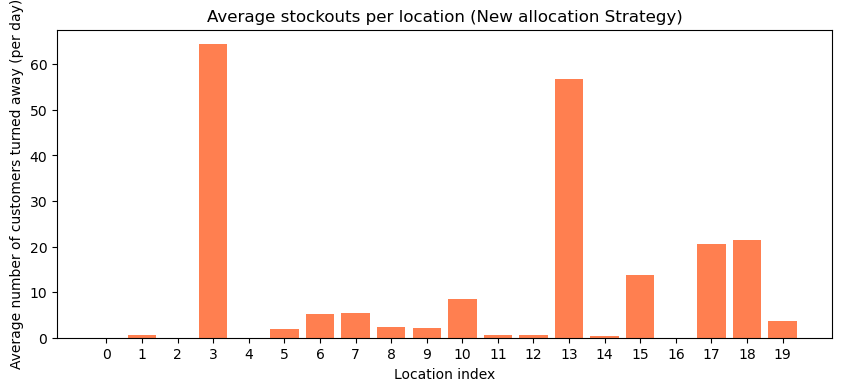

In [462]:
# Evaluation of new  allocation strategy

total_bikes = 1000
num_locations = 20

demand_based_alloc = get_bikes_allocation(avg_daily_demand_per_loc, total_bikes)
print("Demand-based allocation:", demand_based_alloc)

new_distribution = EvaluateAllocation(demand_based_alloc, n_reps=60) # 60 repetitions interpreted as 60 days
print("Demand-based service level (mean ± std):", f"{new_distribution['avg_service']:.4f} ± {new_distribution['std_service']:.4f}")
print("95% Confidence Interval:", new_distribution['confidence_interval'])

# Plot average stockouts per location for new allocation strategy
plt.figure(figsize=(10,4))
plt.title('Average stockouts per location (New allocation Strategy)')
plt.bar(range(num_locations), new_distribution['avg_stockouts'], color='coral')
plt.ylabel('Average number of customers turned away (per day)')
plt.xlabel('Location index')
plt.xticks(range(num_locations))
plt.show()


### Summary 
---
Overall, the new strategy did outperform the previous policy of uniform distribution of stock. However, the change in service level is almost arbitrary. In the siimulation of the intial policy, a mean value of 0.8869 was obtained, wheras in the new strategy was 0.8883 Clearly, many of the locations that experienced high stockout levels still experience this issue. These underwhelming results are likely due to the fact that the new strategy did not take into account the probability that a bike would actually be returned to a given location, meaning future models should consider this data. 